In [1]:
import torch
import torchvision.models as models
import model
import torch
import torch.autograd as autograd
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt

In [27]:
def find_class(results, obj = 'car'):
    len_of_class = len(results.pred)
    pred_class = [int(results.pred[0][i].numpy()[5]) for i in range(len(results.pred[0]))]
    #list_of_yolo_classes = list(zip(results.names, range(0, len(results.names))))
    pred_names = [results.names[i] for i in pred_class]
    if obj in pred_names:
        index = pred_names.index(obj)
        return results.pred[0][index].numpy()
    else:
        return None

In [2]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, pretrained=True)


base_model = models.vgg16(pretrained=True)
model = model.NIMA(base_model)
model.load_state_dict(torch.load(r'C:\Users\CIG\Documents\Neural-IMage-Assessment-master\model\epoch-82.pth',
                                map_location=torch.device('cpu')))
model.eval()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\CIG/.cache\torch\hub\master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   

Adding autoShape... 


NIMA(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [3]:
img_path = r'C:\Users\CIG\Documents\car_imgs'

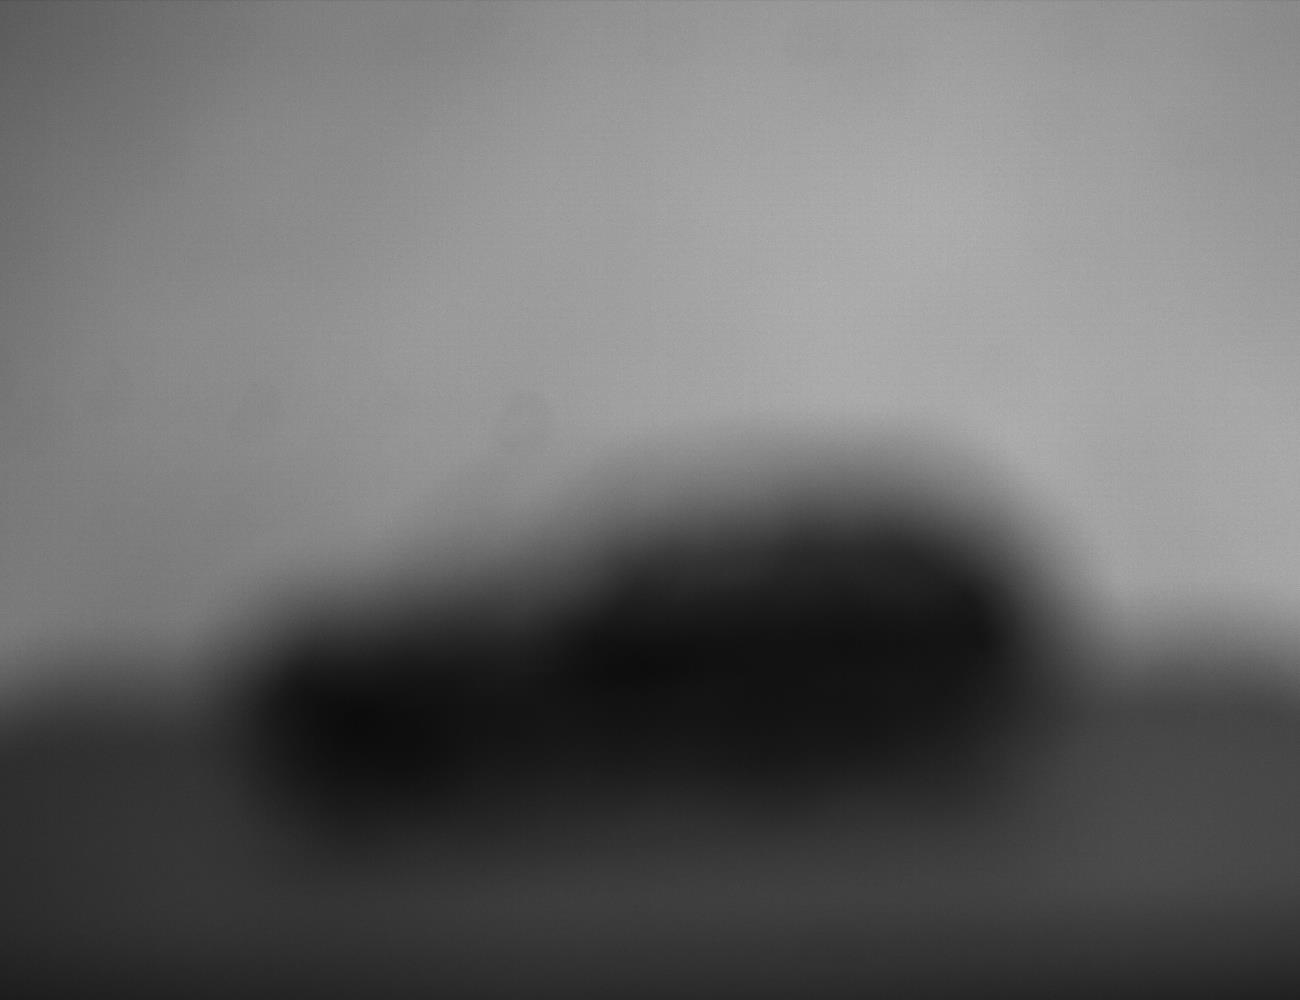

In [31]:
img = Image.open(img_path + '\Image__35f.jpg')
display(img)

In [32]:
results = model_yolo(img, size=640)  
results.print()  # print results to screen
results.show()  # display results

image 1/1: 1000x1300


In [33]:
test_transform = transforms.Compose([
    transforms.Scale(256), 
    transforms.RandomCrop(224), 
    transforms.ToTensor()
    ])

# tensor_transform = transforms.Compose([
#     transforms.ToTensor()
#     ])

im = img
im = im.convert('RGB')
imt = test_transform(im)
# plt.imshow(imt)
# imt = tensor_transform(im)
imt = imt.unsqueeze(dim=0)
imt = imt.to('cpu')


with torch.no_grad():
    out = model(imt)
out = out.view(10, 1)
mean, std = 0.0, 0.0
for j, e in enumerate(out, 1):
    mean += j * e
for k, e in enumerate(out, 1):
    std += e * (k - mean) ** 2
std = std ** 0.5

print(mean, std)

tensor([4.85905]) tensor([1.63036])


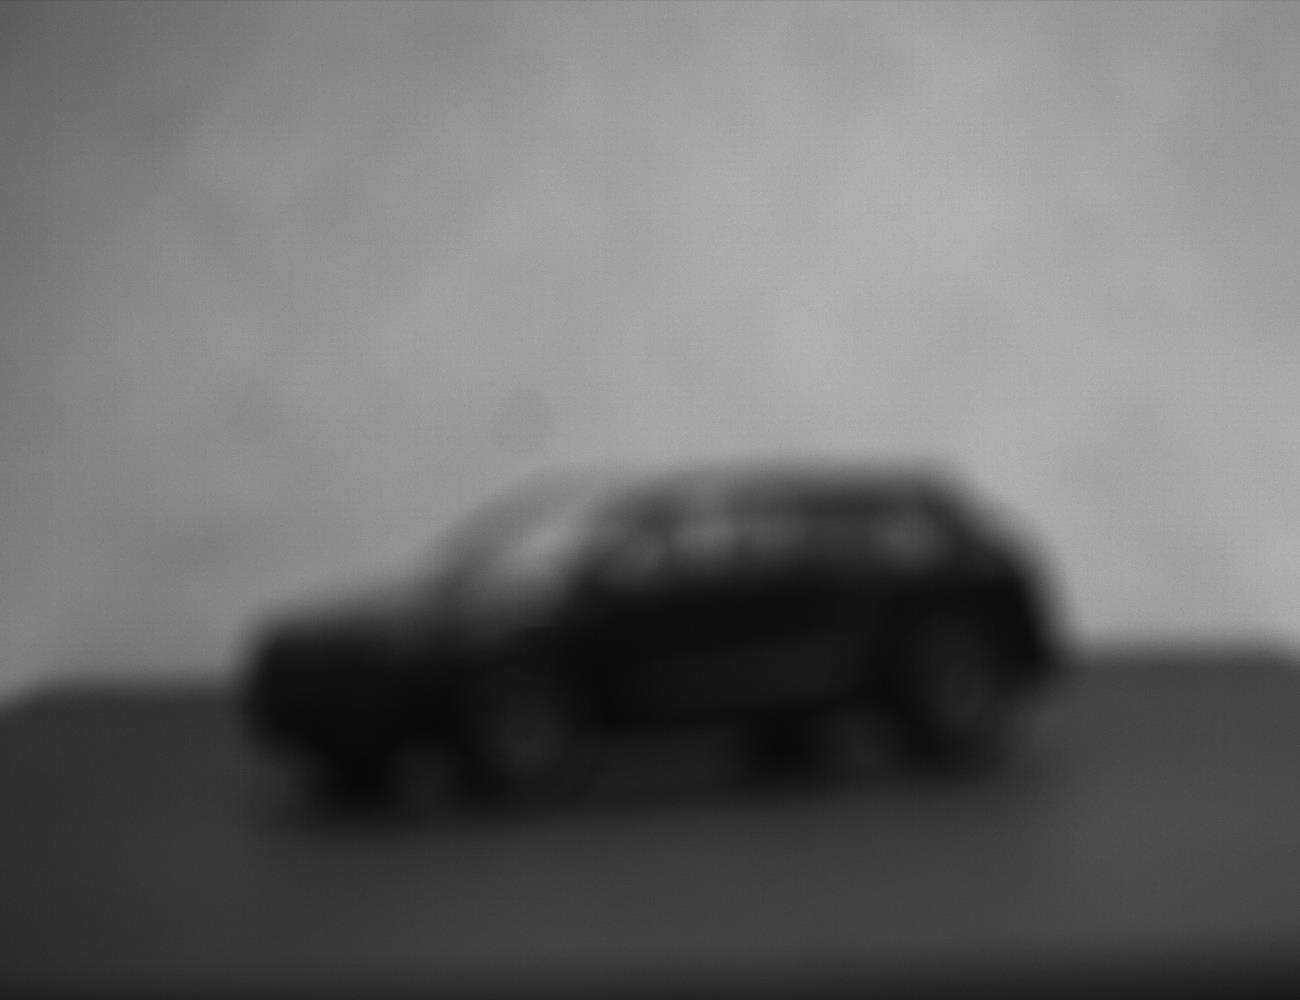

In [34]:
img = Image.open(img_path + '\Image__45f.jpg')
display(img)

In [35]:
results = model_yolo(img, size=640)  
results.print()  # print results to screen
results.show()  # display results


test_transform = transforms.Compose([
    transforms.Scale(256), 
    transforms.RandomCrop(224), 
    transforms.ToTensor()
    ])

# tensor_transform = transforms.Compose([
#     transforms.ToTensor()
#     ])

im = img
im = im.convert('RGB')
imt = test_transform(im)
# plt.imshow(imt)
# imt = tensor_transform(im)
imt = imt.unsqueeze(dim=0)
imt = imt.to('cpu')


with torch.no_grad():
    out = model(imt)
out = out.view(10, 1)
mean, std = 0.0, 0.0
for j, e in enumerate(out, 1):
    mean += j * e
for k, e in enumerate(out, 1):
    std += e * (k - mean) ** 2
std = std ** 0.5

print(mean, std)

image 1/1: 1000x1300
tensor([4.78338]) tensor([1.57946])


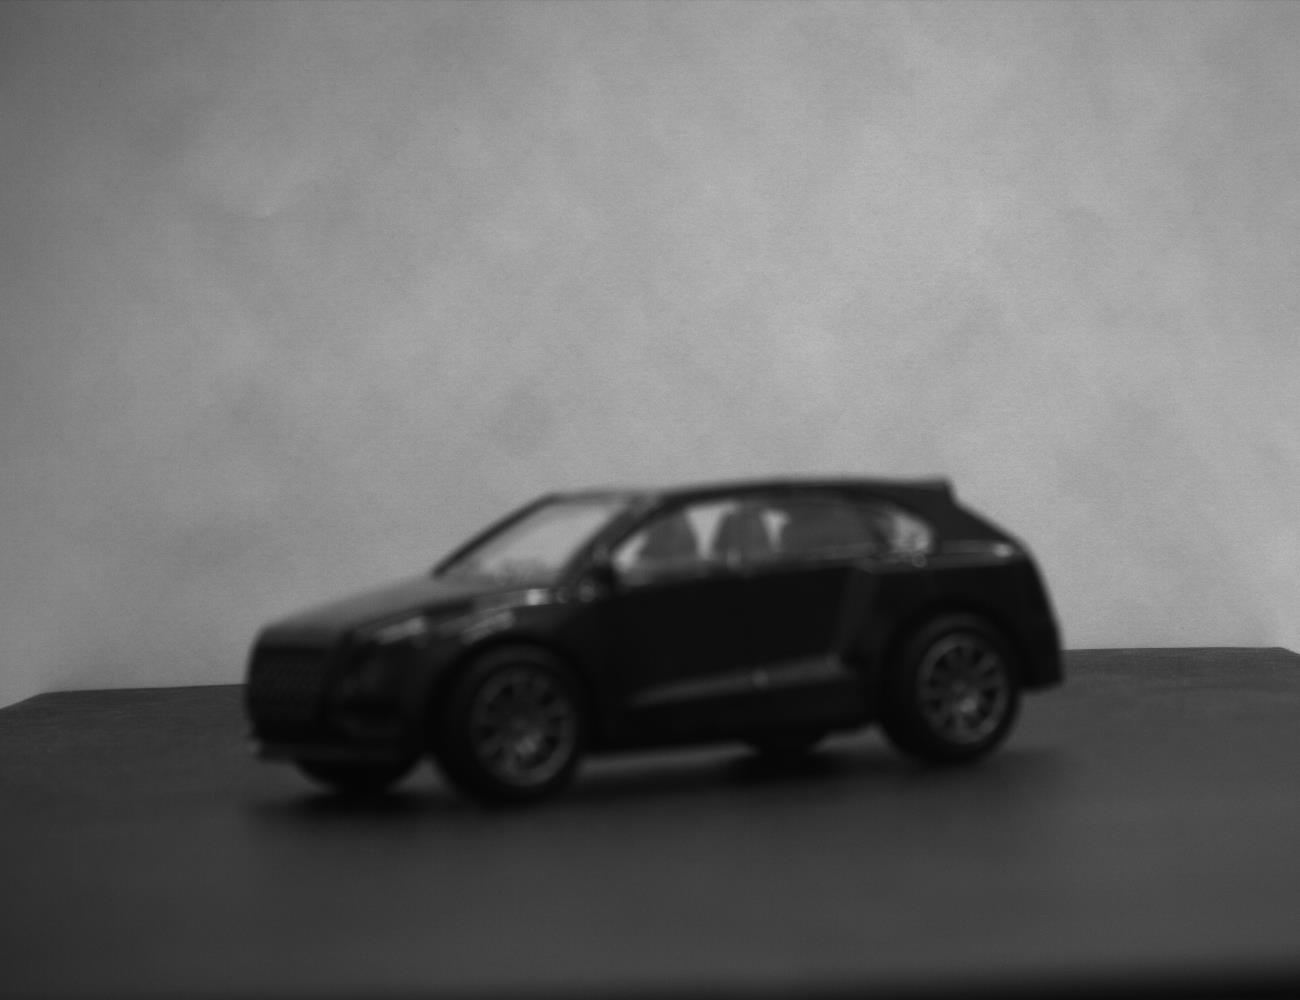

In [37]:
img = Image.open(img_path + '\Image__50f.jpg')
display(img)

image 1/1: 1000x1300 1 car


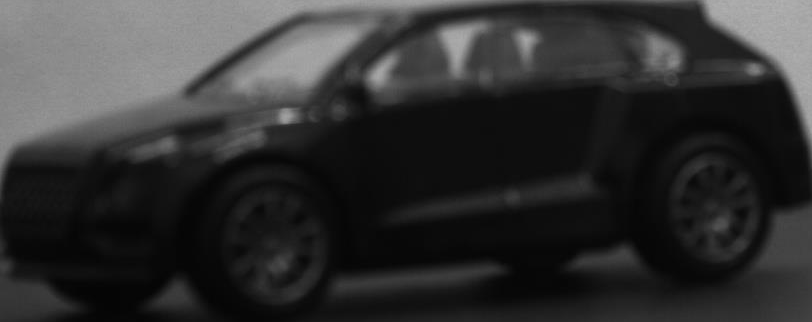

tensor([4.31135]) tensor([1.50090])


In [38]:
results = model_yolo(img, size=640)  
results.print()  # print results to screen
results.show()  # display results


r = find_class(results)
img = img.crop((r[0], r[1], r[2], r[3]))
display(img)


test_transform = transforms.Compose([
    transforms.Scale(256), 
    transforms.RandomCrop(224), 
    transforms.ToTensor()
    ])

# tensor_transform = transforms.Compose([
#     transforms.ToTensor()
#     ])

im = img
im = im.convert('RGB')
imt = test_transform(im)
# plt.imshow(imt)
# imt = tensor_transform(im)
imt = imt.unsqueeze(dim=0)
imt = imt.to('cpu')


with torch.no_grad():
    out = model(imt)
out = out.view(10, 1)
mean, std = 0.0, 0.0
for j, e in enumerate(out, 1):
    mean += j * e
for k, e in enumerate(out, 1):
    std += e * (k - mean) ** 2
std = std ** 0.5

print(mean, std)

In [1]:
# import torch
# import torchvision.models as models
# import model
# import torch
# import torch.autograd as autograd
# import torch.optim as optim

# import torchvision.transforms as transforms
# import torchvision.datasets as dsets
# import torchvision.models as models
# from PIL import Image
# import matplotlib.pyplot as plt

In [2]:
# base_model = models.vgg16(pretrained=True)
# model = model.NIMA(base_model)
# model.load_state_dict(torch.load(r'C:\Users\CIG\Documents\Neural-IMage-Assessment-master\model\epoch-82.pth',
#                                 map_location=torch.device('cpu')))
# model.eval()

NIMA(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

AttributeError: 'Image' object has no attribute 'unsqueeze'

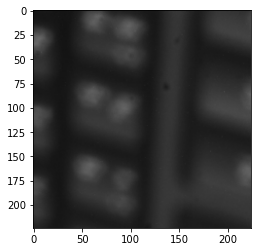

In [11]:
# test_transform = transforms.Compose([
#     transforms.Scale(256), 
#     transforms.RandomCrop(224), 
#     #transforms.ToTensor()
#     ])

# im = Image.open(r"C:\Users\CIG\Documents\MATLAB\imgs\img_0_True_52_40662146706809.png")
# #(os.path.join(args.test_images, str(img) + '.jpg'))
# im = im.convert('RGB')

# imt = test_transform(im)
# plt.imshow(imt)
# imt = imt.unsqueeze(dim=0)
# imt = imt.to('cpu')


# with torch.no_grad():
#     out = model(imt)
# out = out.view(10, 1)
# mean, std = 0.0, 0.0
# for j, e in enumerate(out, 1):
#     mean += j * e
# for k, e in enumerate(out, 1):
#     std += e * (k - mean) ** 2
# std = std ** 0.5

In [4]:
# mean, std

(tensor([4.8091]), tensor([1.5202]))

AttributeError: 'Image' object has no attribute 'unsqueeze'

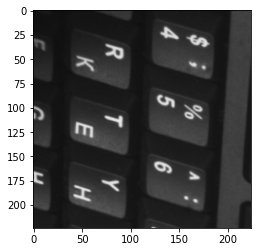

In [13]:
# test_transform = transforms.Compose([
#     transforms.Scale(256), 
#     transforms.RandomCrop(224), 
#     #transforms.ToTensor()
#     ])

# im = Image.open(r"C:\Users\CIG\Documents\MATLAB\imgs\img_7_True_54.02207809591889.png")
# #(os.path.join(args.test_images, str(img) + '.jpg'))
# im = im.convert('RGB')

# imt = test_transform(im)
# plt.imshow(imt)
# imt = imt.unsqueeze(dim=0)
# imt = imt.to('cpu')


# with torch.no_grad():
#     out = model(imt)
# out = out.view(10, 1)
# mean, std = 0.0, 0.0
# for j, e in enumerate(out, 1):
#     mean += j * e
# for k, e in enumerate(out, 1):
#     std += e * (k - mean) ** 2
# std = std ** 0.5

In [6]:
# mean, std

(tensor([4.5627]), tensor([1.5456]))

AttributeError: 'Image' object has no attribute 'unsqueeze'

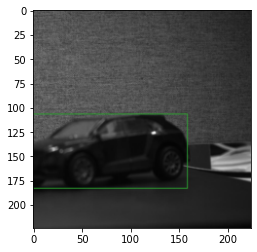

In [18]:
# test_transform = transforms.Compose([
#     transforms.Scale(256), 
#     transforms.RandomCrop(224), 
#     #transforms.ToTensor()
#     ])

# im = Image.open(r"C:\Users\CIG\Documents\MATLAB\results0.jpg")
# #(os.path.join(args.test_images, str(img) + '.jpg'))
# im = im.convert('RGB')
# #plt.imshow(im)
# imt = test_transform(im)
# plt.imshow(imt)
# imt = imt.unsqueeze(dim=0)
# imt = imt.to('cpu')


# with torch.no_grad():
#     out = model(imt)
# out = out.view(10, 1)
# mean, std = 0.0, 0.0
# for j, e in enumerate(out, 1):
#     mean += j * e
# for k, e in enumerate(out, 1):
#     std += e * (k - mean) ** 2
# std = std ** 0.5

In [8]:
# mean, std

(tensor([4.9766]), tensor([1.4037]))